<h3> IMPORT LIBRARIES </H3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
File1=('TCtrain.csv')           #LOAD FILES
File2=('TCtest.csv')

In [3]:
df1= pd.read_csv(File1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df2= pd.read_csv(File2)
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_test= df2.copy()
df_test.shape                  # creating an extra copy of test file

(418, 11)

In [6]:
df_train = df1.append(df2, ignore_index=True) # combined train and test file to lessen the coding part.
df_train.head()

C:\Users\Noorpinder\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [7]:
missing_dt = df_train.isnull()    #CHECK FOR NULL VALUES
missing_dt.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False


In [8]:
df_train.shape

(1309, 12)

In [9]:
df_train.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [10]:
 for column in missing_dt.columns.values.tolist():
    print(column)
    print(missing_dt[column].value_counts())
    print("")

Age
False    1046
True      263
Name: Age, dtype: int64

Cabin
True     1014
False     295
Name: Cabin, dtype: int64

Embarked
False    1307
True        2
Name: Embarked, dtype: int64

Fare
False    1308
True        1
Name: Fare, dtype: int64

Name
False    1309
Name: Name, dtype: int64

Parch
False    1309
Name: Parch, dtype: int64

PassengerId
False    1309
Name: PassengerId, dtype: int64

Pclass
False    1309
Name: Pclass, dtype: int64

Sex
False    1309
Name: Sex, dtype: int64

SibSp
False    1309
Name: SibSp, dtype: int64

Survived
False    891
True     418
Name: Survived, dtype: int64

Ticket
False    1309
Name: Ticket, dtype: int64



In [11]:
df_train.max()

Age                                     80
Fare                               512.329
Name           van Melkebeke, Mr. Philemon
Parch                                    9
PassengerId                           1309
Pclass                                   3
Sex                                   male
SibSp                                    8
Survived                                 1
Ticket                           WE/P 5735
dtype: object

<h4>Age, Cabin and Embarked has null values</h41>

In [12]:
df_train.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: Survived, dtype: float64

75% FEMALE AND 20% MALE PASSENGERS SURVIVED THE ACCIDENT

In [13]:
Age_mean= df_train['Age'].mean(axis=0)
Age_mean                               #REPLACING NULL VALUES IN AGE BY MEAN OF THE COLUMN.

29.881137667304014

In [14]:
df_train['Age'].replace(np.NaN,Age_mean, inplace = True)
df_train['Age'].astype("int").head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int32

In [15]:
df_train['Embarked'].value_counts()   #REPLACING NULL VALUES IN EMBARKED BY MODE OF THE COLUMN.

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
df_train['Embarked'].replace(np.nan, "S")
df_train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

<h4> Dropping CABIN as it has large no. of null values <h4>

In [17]:
df_train.drop(columns=['Cabin'], axis=1).head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


<h4> Replacing alphabetic categories with Numerical Categories</h4>

In [18]:
df_train['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450


In [19]:
df_train['Pclass'].replace(to_replace=[1,2,3], value=["PC1", "PC2", "PC3"],inplace=True)
df_train['Pclass'].head()

0    PC3
1    PC1
2    PC3
3    PC1
4    PC3
Name: Pclass, dtype: object

In [20]:
dummy = pd.get_dummies(df_train['Pclass'])     #CREATING DUMMY VARIABLES TO GET DATA IN 0 AND 1 FORM.
dummy1 = pd.get_dummies(df_train['Embarked'])

Text(0, 0.5, 'Survival Rate')

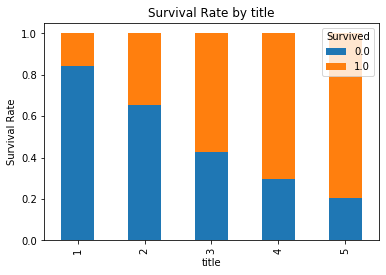

In [21]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

def title_map(title):
    if title in ['Mr']:
        return 1
    elif title in ['Master']:
        return 3
    elif title in ['Ms','Mlle','Miss']:
        return 4
    elif title in ['Mme','Mrs']:
        return 5
    else:
        return 2


df_train['title'] = df_train['Name'].apply(get_title).apply(title_map)   
title_xt = pd.crosstab(df_train['title'], df_train['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1), axis=0)

title_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Survival Rate by title')
plt.xlabel('title')
plt.ylabel('Survival Rate')

<h4> Let's see if AGE and FARE are affecting out Target </h4>

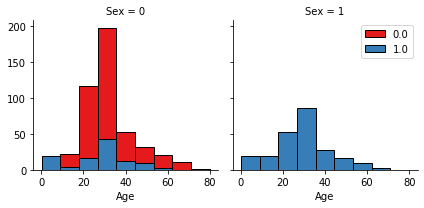

In [22]:
import seaborn as sns

bins = np.linspace(df_train.Age.min(), df_train.Age.max(), 10)
g =sns.FacetGrid(df_train, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins,ec="k")

g.axes[-1].legend()
plt.show()

In [23]:
df_train['Age'] = df_train['Age'].astype(int)

df_train.loc[ df_train['Age'] <= 17, 'Age'] = 0
df_train.loc[(df_train['Age'] > 18) & (df_train['Age'] <= 35), 'Age'] = 1
df_train.loc[(df_train['Age'] > 36) & (df_train['Age'] <= 55), 'Age'] = 2
df_train.loc[(df_train['Age'] > 56) & (df_train['Age'] <= 65), 'Age'] = 3
df_train.loc[(df_train['Age'] > 66), 'Age'] = 4

In [24]:
df_train['Age'].replace(to_replace=[0,1,2,3,4], value=["Child", "Y_Adults", "MidAge_Adults","O_Adults","Old"],inplace=True)
df_train['Age'].head()

0         Y_Adults
1    MidAge_Adults
2         Y_Adults
3         Y_Adults
4         Y_Adults
Name: Age, dtype: object

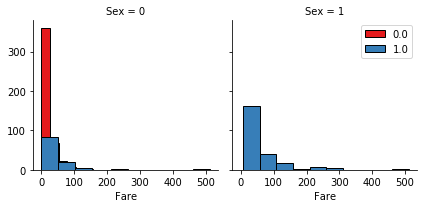

In [25]:
bins = np.linspace(df_train.Fare.min(), df_train.Fare.max(),10)
g = sns.FacetGrid(df_train, col ="Sex", hue ="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Fare', ec="k")

g.axes[-1].legend()
plt.show()

In [26]:
df_train["Fare"].fillna(df_train["Fare"].median(), inplace=True)

df_train.loc[ df_train['Fare'] <= 7.91, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 7.91) & (df_train['Fare'] <= 14.454), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 31), 'Fare'] = 2
df_train.loc[ df_train['Fare'] > 31, 'Fare'] = 3   #mostly OUTLIERS

# convert from float to int
df_train['Fare'] = df_train['Fare'].astype(int)

In [27]:
df_train['Fare'].replace(to_replace=[0,1,2,3], value=["Low", "Medium", "High","Extreme"],inplace=True)
df_train['Fare'].head()

0        Low
1    Extreme
2     Medium
3    Extreme
4     Medium
Name: Fare, dtype: object

In [28]:
dummy2 = pd.get_dummies(df_train['Age'])
dummy3 = pd.get_dummies(df_train['Fare'])

In [29]:
train_new = df_train[['Sex','Survived']]

In [30]:
train_new = pd.concat([train_new, dummy, dummy1, dummy2, dummy3], axis=1)

In [31]:
train_new.head()

,Sex,Survived,PC1,PC2,PC3,C,Q,S,18,36,...,66,Child,MidAge_Adults,O_Adults,Old,Y_Adults,Extreme,High,Low,Medium
0,0,0.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,1.0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,1.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


<h3> To model, we have to separate train and test data, otherwise it will give null values error </h3>

In [32]:
train = train_new[train_new.Survived.notnull()]

In [33]:
train.shape

(891, 21)

In [34]:
X_train = train[['Sex','Child','MidAge_Adults','O_Adults','Y_Adults','Low','Medium','High','Extreme','PC1','PC2','PC3','C','Q','S']]
X_train[0:5]

,Sex,Child,MidAge_Adults,O_Adults,Y_Adults,Low,Medium,High,Extreme,PC1,PC2,PC3,C,Q,S
0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1


In [35]:
Y_train = train[['Survived']]
Y_train[0:5]

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [36]:
test = train_new[train_new.Survived.isnull()]
test.head()

,Sex,Survived,PC1,PC2,PC3,C,Q,S,18,36,...,66,Child,MidAge_Adults,O_Adults,Old,Y_Adults,Extreme,High,Low,Medium
891,0,NaN,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
892,1,NaN,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
893,0,NaN,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
894,0,NaN,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
895,1,NaN,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [37]:
test.shape

(418, 21)

In [38]:
X_test = test[['Sex','Child','MidAge_Adults','O_Adults','Y_Adults','Low','Medium','High','Extreme','PC1','PC2','PC3','C','Q','S']]

In [39]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)

C:\Users\Noorpinder\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
LR.fit(X_train, Y_train)

C:\Users\Noorpinder\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
Y_test = LR.predict(X_test)

In [42]:
LR.score(X_test, Y_test)

1.0

In [43]:
len(Y_test)

418

In [44]:
len(df_test)

418

In [45]:
df_test['Survived'] = Y_test

In [46]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
